# Models training

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from sklearn.model_selection import GridSearchCV,StratifiedKFold, KFold
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,balanced_accuracy_score,auc
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.externals import joblib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

d:\python3.6.0\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
inputfile = './data_processed/final_end_StandardScaler.xlsx'
data_temp = pd.read_excel(inputfile, index_col='id')
data_temp = data_temp[data_temp.columns[30:]]
print(data_temp.shape)
data_temp.head()

(1101, 71)


,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39576,1,0.709677,0.284247,0.369192,0.015739,0.468018,0.135726,0.101137,0.311424,0.366817,0.048519,0.012806,0.727835,0.174828,0.533788,0.063000,0.007018,0.052819,0.002244,0.032726,0.003054,0.004849,0.019132,0.017193,0.028892,0.003009,0.000945,0.114247,0.521303,0.613909,0.357369,0.233352,0.155813,0.366683,0.581610,0.012787,0.023895,0.115568,0.009340,0.028986,0.022451,0.025610,0.048703,0.030062,0.001024,0.018616,0.046882,0.606749,0.196080,0.340439,0.322126,0.360568,0.016196,0.345404,0.308546,0.467,0.045062,0.035111,0.007043,0.179392,0.009437,0.097954,0.007531,0.059016,0.073548,0.040074,0.138615,0.002246,1.000000,0.015441,1
55893,0,0.924731,0.393836,0.511124,0.022499,0.497466,0.113292,0.063597,0.199531,0.552724,0.247180,0.027476,0.936082,0.040345,0.204429,0.000000,0.000000,0.140753,0.001288,0.028504,0.000000,0.000000,0.004763,0.003564,0.014446,0.000908,0.000181,0.066532,0.461265,0.532374,0.326071,0.228230,0.084596,0.069410,0.020080,0.404575,0.002098,0.074840,0.006981,0.026060,0.025417,0.026913,0.021123,0.006500,0.000091,0.001570,0.002761,0.604732,0.147796,0.250646,0.859002,0.024867,0.005441,0.367688,0.279689,0.212,0.010216,0.017059,0.001354,0.005587,0.000267,0.047840,0.004770,0.065705,0.032258,0.044819,0.004830,0.000373,0.095357,0.001630,1
115349,1,0.731183,0.301370,0.369192,0.019013,0.603910,0.119462,0.040411,0.379108,0.306847,0.052921,0.020218,0.961856,0.034138,0.071550,0.000000,0.002632,0.106967,0.000751,0.007918,0.000000,0.003636,0.006539,0.004822,0.017456,0.004882,0.001528,0.058468,0.345094,0.482014,0.214535,0.327262,0.302577,0.097735,0.048111,0.346586,0.004616,0.065950,0.006025,0.030112,0.029123,0.028215,0.013900,0.013162,0.000188,0.005233,0.011681,0.688626,0.165461,0.299742,0.959870,0.065719,0.078198,0.330084,0.264151,0.119,0.007605,0.011644,0.000542,0.021415,0.001068,0.051552,0.004979,0.077016,0.002581,0.016873,0.006645,0.000349,0.039554,0.003666,1
161618,0,0.537634,0.160470,0.168122,0.009190,0.543085,0.152552,0.098046,0.223592,0.623188,0.035036,0.005385,0.787629,0.153103,0.313458,0.053597,0.000000,0.024123,0.000858,0.008709,0.001178,0.000000,0.684167,0.706154,0.530287,0.002782,0.003117,0.210685,0.247472,0.250600,0.210552,0.202618,0.132205,0.086938,0.047217,0.300246,0.009154,0.043622,0.011827,0.015366,0.001483,0.006186,0.048265,0.018687,0.000159,0.002299,0.003610,0.634983,0.056822,0.510982,0.264642,0.193606,0.000380,0.190808,0.204218,0.044,0.041090,0.093330,0.019911,0.261018,0.013310,0.064081,0.005649,0.022131,0.024516,0.006459,0.150750,0.004567,0.201145,0.017056,1
191395,1,0.623656,0.404354,0.617573,0.023291,0.493845,0.150869,0.112620,0.287852,0.411294,0.049069,0.037551,0.888660,0.065690,0.267462,0.004937,0.055263,0.181600,0.003078,0.043943,0.000720,0.136364,0.188499,0.212496,0.099617,0.014448,0.013535,0.143313,0.334600,0.281175,0.297618,0.145418,0.253000,0.221167,0.066153,0.331768,0.005180,0.184515,0.007300,0.015731,0.002753,0.007108,0.207617,0.145596,0.000524,0.016401,0.029892,0.750336,0.146618,0.557171,0.488612,0.231350,0.013033,0.277159,0.268590,0.159,0.041456,0.105064,0.025668,0.184823,0.009415,0.057120,0.005251,0.075393,0.110968,0.146915,0.016153,0.000250,0.035668,0.000950,1


In [3]:
inputfile_1 = './data_processed/feature_sort_all_453.xlsx'
data_sort_453 = pd.read_excel(inputfile_1, index_col='id')
print(data_sort_453.shape)
data_sort_453.head()

(1117, 453)


,oxygen_saturation__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_mean,diastolic_pressure__minimum,temperature__quantile__q_0.9,oxygen_saturation__time_reversal_asymmetry_statistic__lag_1,systollic_pressure__minimum,diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.0,systollic_pressure__first_location_of_minimum,diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.2,diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9,diastolic_pressure__fft_coefficient__attr_imag__coeff_54,breath_rate__index_mass_quantile__q_0.6,systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.2,systollic_pressure__last_location_of_minimum,temperature__quantile__q_0.1,heart_rate__fft_coefficient__attr_abs__coeff_57,breath_rate__last_location_of_maximum,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_1.0__ql_0.8,temperature__ar_coefficient__coeff_6__k_10,oxygen_saturation__change_quantiles__f_agg_var__isabs_False__qh_1.0__ql_0.0,diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_7,heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_9,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.6,temperature__cwt_coefficients__coeff_1__w_2__widths_2_5_10_20,heart_rate__binned_entropy__max_bins_10,oxygen_saturation__fft_coefficient__attr_angle__coeff_7,diastolic_pressure__fft_coefficient__attr_angle__coeff_8,systollic_pressure__index_mass_quantile__q_0.1,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_1.0__ql_0.6,heart_rate__mean_second_derivative_central,oxygen_saturation__ratio_value_number_to_time_series_length,oxygen_saturation__fft_coefficient__attr_imag__coeff_18,breath_rate__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.8,diastolic_pressure__agg_linear_trend__attr_slope__chunk_len_10__f_agg_min,oxygen_saturation__mean_change,heart_rate__maximum,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0,oxygen_saturation__fft_coefficient__attr_angle__coeff_23,oxygen_saturation__agg_linear_trend__attr_slope__chunk_len_50__f_agg_mean,diastolic_pressure__ar_coefficient__coeff_0__k_10,heart_rate__index_mass_quantile__q_0.7,systollic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.2,heart_rate__approximate_entropy__m_2__r_0.5,breath_rate__minimum,systollic_pressure__fft_coefficient__attr_imag__coeff_11,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.6__ql_0.2,oxygen_saturation__fft_coefficient__attr_angle__coeff_2,heart_rate__change_quantiles__f_agg_var__isabs_True__qh_1.0__ql_0.0,breath_rate__fft_coefficient__attr_angle__coeff_2,temperature__approximate_entropy__m_2__r_0.3,oxygen_saturation__fft_coefficient__attr_abs__coeff_44,heart_rate__count_above_mean,breath_rate__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_min,systollic_pressure__quantile__q_0.1,heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_8,systollic_pressure__change_quantiles__f_agg_mean__isabs_False__qh_0.6__ql_0.0,systollic_pressure__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0,temperature__energy_ratio_by_chunks__num_segments_10__segment_focus_7,temperature__ratio_value_number_to_time_series_length,heart_rate__change_quantiles__f_agg_var__isabs_True__qh_1.0__ql_0.8,temperature__approximate_entropy__m_2__r_0.1,systollic_pressure__agg_linear_trend__attr_slope__chunk_len_10__f_agg_min,heart_rate__standard_deviation,diastolic_pressure__fft_coefficient__attr_imag__coeff_8,systollic_pressure__cwt_coefficients__coeff_6__w_2__widths_2_5_10_20,breath_rate__autocorrelation__lag_5,temperature__autocorrelation__lag_7,breath_rate__index_mass_quantile__q_0.3,temperature__absolute_sum_of_changes,oxygen_saturation__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_mean,temperature__autocorrelation__lag_4,oxygen_saturation__autocorrelation__lag_3,diastolic_pressure__change_q

In [4]:
nums = 60  # threshold

In [5]:
data_sort_453.columns[0:nums]

Index(['oxygen_saturation__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_mean',
       'diastolic_pressure__minimum', 'temperature__quantile__q_0.9',
       'oxygen_saturation__time_reversal_asymmetry_statistic__lag_1',
       'systollic_pressure__minimum',
       'diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.0',
       'systollic_pressure__first_location_of_minimum',
       'diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.2',
       'diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
       'diastolic_pressure__fft_coefficient__attr_imag__coeff_54',
       'breath_rate__index_mass_quantile__q_0.6',
       'systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
       'oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.2',
       'systollic_pressure__last_location_of_minimum',
       'temperature__quantile__q_0.1',
       'heart_rate__fft_coefficient

In [6]:
data_sort_n = data_sort_453[data_sort_453.columns[0:nums]]
data_sort_n.shape

(1117, 60)

In [7]:
data = data_sort_n.join(data_temp)
data.shape

(1118, 131)

In [8]:
data = data.dropna(axis=0, how='any')
print(data.shape)
data.head()

(1101, 131)


,oxygen_saturation__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_mean,diastolic_pressure__minimum,temperature__quantile__q_0.9,oxygen_saturation__time_reversal_asymmetry_statistic__lag_1,systollic_pressure__minimum,diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.0,systollic_pressure__first_location_of_minimum,diastolic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.2,diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9,diastolic_pressure__fft_coefficient__attr_imag__coeff_54,breath_rate__index_mass_quantile__q_0.6,systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.2,systollic_pressure__last_location_of_minimum,temperature__quantile__q_0.1,heart_rate__fft_coefficient__attr_abs__coeff_57,breath_rate__last_location_of_maximum,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_1.0__ql_0.8,temperature__ar_coefficient__coeff_6__k_10,oxygen_saturation__change_quantiles__f_agg_var__isabs_False__qh_1.0__ql_0.0,diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_7,heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_9,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.6,temperature__cwt_coefficients__coeff_1__w_2__widths_2_5_10_20,heart_rate__binned_entropy__max_bins_10,oxygen_saturation__fft_coefficient__attr_angle__coeff_7,diastolic_pressure__fft_coefficient__attr_angle__coeff_8,systollic_pressure__index_mass_quantile__q_0.1,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_1.0__ql_0.6,heart_rate__mean_second_derivative_central,oxygen_saturation__ratio_value_number_to_time_series_length,oxygen_saturation__fft_coefficient__attr_imag__coeff_18,breath_rate__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.8,diastolic_pressure__agg_linear_trend__attr_slope__chunk_len_10__f_agg_min,oxygen_saturation__mean_change,heart_rate__maximum,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0,oxygen_saturation__fft_coefficient__attr_angle__coeff_23,oxygen_saturation__agg_linear_trend__attr_slope__chunk_len_50__f_agg_mean,diastolic_pressure__ar_coefficient__coeff_0__k_10,heart_rate__index_mass_quantile__q_0.7,systollic_pressure__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.2,heart_rate__approximate_entropy__m_2__r_0.5,breath_rate__minimum,systollic_pressure__fft_coefficient__attr_imag__coeff_11,oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.6__ql_0.2,oxygen_saturation__fft_coefficient__attr_angle__coeff_2,heart_rate__change_quantiles__f_agg_var__isabs_True__qh_1.0__ql_0.0,breath_rate__fft_coefficient__attr_angle__coeff_2,temperature__approximate_entropy__m_2__r_0.3,oxygen_saturation__fft_coefficient__attr_abs__coeff_44,heart_rate__count_above_mean,breath_rate__agg_linear_trend__attr_rvalue__chunk_len_5__f_agg_min,systollic_pressure__quantile__q_0.1,heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_8,systollic_pressure__change_quantiles__f_agg_mean__isabs_False__qh_0.6__ql_0.0,systollic_pressure__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0,temperature__energy_ratio_by_chunks__num_segments_10__segment_focus_7,temperature__ratio_value_number_to_time_series_length,heart_rate__change_quantiles__f_agg_var__isabs_True__qh_1.0__ql_0.8,gender,age,RBC,Hemoglobin,Hematocrit,MRBC,MHGBC,MEHGBC,RBCCV,RBCSD,Platelet,WBCC,NNPC,LPPC,MCPC,ESPC,BSPC,NNAV,LPAV,MCAV,ESAV,BSAV,TBB,DBB,IDBB,AST,ALT,AST_ALT,TP,ALB,GLO,WBR,GLU,Urea,Creatinine,EGFR,DSCC,UA,Triglyceride,cholesterol,HDLP,LDLP,AKPP,GLTP,CTKN,LTDD,HBDD,sodium,potassium,chlorine,CO2BF,AG,DSHA,calcium,magnesium,SIPP,TTBA,PRT,INR,APTT,APTTR,TBT,TBTR,Fibrinogen,FDP,FEU,Myoglobin,MCKMB,UNP,Troponin,labels
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31237,0.593783,0.700935,0.215789,0.995573,0.758427,

In [9]:
data.columns[70 + nums]

'labels'

In [10]:
X = data.iloc[:, 0:(70+nums)]
y = data.iloc[:, (70+nums)]

#X = data.iloc[:, 0:70]
#y = data.iloc[:, 70]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)  # 保证分割后y的比例分布与原数据一致

data.shape, X_train.shape, X_test.shape

((1101, 131), (880, 130), (221, 130))

In [11]:
y_test.value_counts()

1.0    158
0.0     63
Name: labels, dtype: int64

In [12]:
# LogisticRegression
lr = LR(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
        intercept_scaling=1, class_weight='balanced', random_state=1, solver='liblinear', 
        max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

lr.fit(X_train, y_train)

lr_y_predict = lr.predict(X_test)
lr_y_probs = lr.predict_proba(X_test) # model score

train_lr_y_score = lr.score(X_train, y_train)
test_lr_y_score = lr.score(X_test, y_test)
print("Accuracy of LogisticRegression(Train): {score}".format(score=train_lr_y_score))
print("Accuracy of LogisticRegression(Test): {score}".format(score=test_lr_y_score))

Accuracy of LogisticRegression(Train): 0.9056818181818181
Accuracy of LogisticRegression(Test): 0.8280542986425339


In [13]:
print("LR: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lr_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, lr_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lr_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lr_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lr_y_predict)))  # 平衡精度

LR: 
ACCURACY         : 0.8280542986425339
AUC              : 0.9133011854530841
RECALL           : 0.8417721518987342
PRECISION        : 0.910958904109589
BALANCED_ACCURACY: 0.8177114727747639


In [14]:
col_name = data.columns[:-1]

m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
    
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9',
  2.6197859556916687),
 ('heart_rate__approximate_entropy__m_2__r_0.5', 2.295343961480182),
 ('heart_rate__binned_entropy__max_bins_10', 2.2752255997547186),
 ('oxygen_saturation__agg_linear_trend__attr_rvalue__chunk_len_50__f_agg_mean',
  2.158585860528768),
 ('diastolic_pressure__minimum', 1.8603299559096507),
 ('temperature__ratio_value_number_to_time_series_length', 1.7549082713239923),
 ('DSHA', 1.7513631597310213),
 ('systollic_pressure__quantile__q_0.1', 1.625878255870771),
 ('SIPP', 1.424556916382357),
 ('oxygen_saturation__fft_coefficient__attr_angle__coeff_7',
  1.0237055122900378),
 ('oxygen_saturation__fft_coefficient__attr_angle__coeff_2',
  0.9874765388366914),
 ('CO2BF', 0.9522250817590573),
 ('NNPC', 0.9292960015487841),
 ('diastolic_pressure__fft_coefficient__attr_angle__coeff_8',
  0.8673195805568022),
 ('temperature__quantile__q_0.1', 0.8354766956026706),
 ('oxygen_saturation__fft_coeff

In [15]:
# K-NearestNeighbor
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

knn.fit(X_train, y_train)

knn_y_predict = knn.predict(X_test)
knn_y_probs = knn.predict_proba(X_test) # model score

train_knn_y_score = knn.score(X_train, y_train)
test_knn_y_score = knn.score(X_test, y_test)
print("Accuracy of K-NearestNeighbor(Train): {score}".format(score=train_knn_y_score)) 
print("Accuracy of K-NearestNeighbor(Test): {score}".format(score=test_knn_y_score))

Accuracy of K-NearestNeighbor(Train): 0.9147727272727273
Accuracy of K-NearestNeighbor(Test): 0.8280542986425339


In [16]:
print("KNN: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, knn_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, knn_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, knn_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, knn_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, knn_y_predict)))  # 平衡精度

KNN: 
ACCURACY         : 0.8280542986425339
AUC              : 0.8678923046011654
RECALL           : 0.9050632911392406
PRECISION        : 0.8614457831325302
BALANCED_ACCURACY: 0.7699919630299377


In [17]:
# Gaussian Naive Byes
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_y_predict = gnb.predict(X_test)
gnb_y_probs = gnb.predict_proba(X_test)

train_gnb_y_score = gnb.score(X_train, y_train)
test_gnb_y_score = gnb.score(X_test, y_test)
print("Accuracy of Gaussian Naive Byes(Train): {score}".format(score=train_gnb_y_score)) 
print("Accuracy of Gaussian Naive Byes(Test): {score}".format(score=test_gnb_y_score)) 

Accuracy of Gaussian Naive Byes(Train): 0.8045454545454546
Accuracy of Gaussian Naive Byes(Test): 0.8099547511312217


In [18]:
print("GaussianNB: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gnb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gnb_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gnb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gnb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gnb_y_predict)))  # 平衡精度

GaussianNB: 
ACCURACY         : 0.8099547511312217
AUC              : 0.7508539280691179
RECALL           : 0.9240506329113924
PRECISION        : 0.8295454545454546
BALANCED_ACCURACY: 0.7239300783604581


In [19]:
# Support Vector Classification
svc = SVC(C=2.2, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
        kernel='linear', max_iter=-1, probability=True, random_state=None,
        shrinking=True, tol=0.001, verbose=False)

svc.fit(X_train, y_train)

svc_y_predict = svc.predict(X_test)
svc_y_probs = svc.predict_proba(X_test)

train_svc_y_score = svc.score(X_train, y_train)
test_svc_y_score = svc.score(X_test, y_test)
print("Accuracy of Support Vector Classification(Train): {score}".format(score=train_svc_y_score))
print("Accuracy of Support Vector Classification(Test): {score}".format(score=test_svc_y_score))

Accuracy of Support Vector Classification(Train): 0.9181818181818182
Accuracy of Support Vector Classification(Test): 0.8506787330316742


In [20]:
print("SVC: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, svc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, svc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, svc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, svc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, svc_y_predict)))  # 平衡精度

SVC: 
ACCURACY         : 0.8506787330316742
AUC              : 0.9151095037170986
RECALL           : 0.9177215189873418
PRECISION        : 0.8787878787878788
BALANCED_ACCURACY: 0.8001306007635122


In [21]:
# Decision Tree
tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

tree.fit(X_train, y_train)

tree_y_predict = tree.predict(X_test)
tree_y_probs = tree.predict_proba(X_test)

train_tree_y_score = tree.score(X_train, y_train)
test_tree_y_score = tree.score(X_test, y_test)
print("Accuracy of Decision Tree(Train): {score}".format(score=train_tree_y_score))
print("Accuracy of Decision Tree(Test): {score}".format(score=test_tree_y_score))

Accuracy of Decision Tree(Train): 1.0
Accuracy of Decision Tree(Test): 0.8552036199095022


In [22]:
print("DT: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, tree_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, tree_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, tree_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, tree_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, tree_y_predict)))  # 平衡精度

DT: 
ACCURACY         : 0.8552036199095022
AUC              : 0.8176110106489853
RECALL           : 0.9050632911392406
PRECISION        : 0.89375
BALANCED_ACCURACY: 0.8176110106489853


In [23]:
# Random Forest
rf = RandomForestClassifier(n_estimators= 93, max_depth=5, min_samples_split=53,
                            min_samples_leaf=14, max_features='sqrt', oob_score=True, random_state=10)

rf.fit(X_train, y_train)

rf_y_predict = rf.predict(X_test)
rf_y_probs = rf.predict_proba(X_test) 

train_rf_y_score = rf.score(X_train, y_train)
test_rf_y_score = rf.score(X_test, y_test)
print("Accuracy of Random Forest(Train): {score}".format(score=train_rf_y_score)) 
print("Accuracy of Random Forest(Test): {score}".format(score=test_rf_y_score))

Accuracy of Random Forest(Train): 0.9170454545454545
Accuracy of Random Forest(Test): 0.8778280542986425


In [24]:
print("RF: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, rf_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, rf_y_probs[:, 1])))        # AUC (在偏态的样本中更稳健)
print("RECALL           : {score}".format(score=recall_score(y_test, rf_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, rf_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, rf_y_predict)))  # 平衡精度

RF: 
ACCURACY         : 0.8778280542986425
AUC              : 0.9317862165963432
RECALL           : 0.9493670886075949
PRECISION        : 0.8875739644970414
BALANCED_ACCURACY: 0.8238898935101466


In [25]:
# AdaBoost
abc = AdaBoostClassifier(base_estimator=None, n_estimators=97, learning_rate=1.0, algorithm='SAMME.R', random_state=10)

abc.fit(X_train, y_train)

abc_y_predict = abc.predict(X_test)
abc_y_probs = abc.predict_proba(X_test)

train_abc_y_score = abc.score(X_train, y_train)
test_abc_y_score = abc.score(X_test, y_test)
print("Accuracy of AdaBoost(Train): {score}".format(score=train_abc_y_score)) 
print("Accuracy of AdaBoost(Test): {score}".format(score=test_abc_y_score)) 

Accuracy of AdaBoost(Train): 1.0
Accuracy of AdaBoost(Test): 0.8959276018099548


In [26]:
print("AdaBoost: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, abc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, abc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, abc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, abc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, abc_y_predict)))  # 平衡精度

AdaBoost: 
ACCURACY         : 0.8959276018099548
AUC              : 0.9498693992364878
RECALL           : 0.930379746835443
PRECISION        : 0.9245283018867925
BALANCED_ACCURACY: 0.8699517781796262


In [27]:
# GradientBoosting
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=114, max_depth=11, max_features=10, 
                                  min_samples_leaf=54, min_samples_split=48, random_state=10)

gbc.fit(X_train, y_train)

gbc_y_predict = gbc.predict(X_test)
gbc_y_probs = gbc.predict_proba(X_test)

train_gbc_y_score = gbc.score(X_train, y_train)
test_gbc_y_score = gbc.score(X_test, y_test)
print("Accuracy of GradientBoosting(Train): {score}".format(score=train_gbc_y_score)) 
print("Accuracy of GradientBoosting(Test): {score}".format(score=test_gbc_y_score))

Accuracy of GradientBoosting(Train): 1.0
Accuracy of GradientBoosting(Test): 0.9276018099547512


In [28]:
print("GradientBoosting: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, gbc_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, gbc_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, gbc_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, gbc_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, gbc_y_predict)))  # 平衡精度

GradientBoosting: 
ACCURACY         : 0.9276018099547512
AUC              : 0.961121157323689
RECALL           : 0.9556962025316456
PRECISION        : 0.94375
BALANCED_ACCURACY: 0.9064195298372513


In [29]:
# LightGBM
# Parameters
params = {"objective": "binary", 
          "boosting": "gbdt",
          "metric": {"binary_logloss", "auc"},
          "max_depth": 2,
          "n_jobs":-1,
          "verbose":-1}

num_folds = 5
results_lgb_accuracy = list()
results_lgb_auc = list()
results_lgb_recall = list()
results_lgb_precision = list()
results_lgb_balanced_accuracy = list()

roc_auc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
pred_on_test = np.zeros(X_test.shape[0])

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2020)
for index, (train_index, valid_index) in enumerate(kf.split(X=X_train, y=y_train)):
    print(f"FOLD {index+1}")

    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_index], y_train.iloc[valid_index]

    dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

    lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

    feature_importances[f'fold_{index + 1}'] = lgb.feature_importance()

    y_valid_pred = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
    pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds
    
    threshold = 0.5
    lgb_y_valid_predict = []

    for pred in y_valid_pred:  
        result = 1 if pred > threshold else 0
        lgb_y_valid_predict.append(result)

    # winsorization
    y_valid_pred = np.clip(a=y_valid_pred, a_min=0, a_max=1)
    pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)
    
    results_lgb_accuracy.append(np.round(accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))
    results_lgb_auc.append(np.round(roc_auc_score(y_valid_fold, y_valid_pred), 5))
    results_lgb_recall.append(np.round(recall_score(y_valid_fold, lgb_y_valid_predict), 5))
    results_lgb_precision.append(np.round(precision_score(y_valid_fold, lgb_y_valid_predict), 5))
    results_lgb_balanced_accuracy.append(np.round(balanced_accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))

    print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred), 5)}")
    roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred)/num_folds)
    
print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc), 5)}")

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0152003	training's auc: 1	valid_1's binary_logloss: 0.139402	valid_1's auc: 0.985238
[500]	training's binary_logloss: 0.00123269	training's auc: 1	valid_1's binary_logloss: 0.160332	valid_1's auc: 0.984127
[750]	training's binary_logloss: 0.00010495	training's auc: 1	valid_1's binary_logloss: 0.192092	valid_1's auc: 0.985238
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0131052	training's auc: 1	valid_1's binary_logloss: 0.134456	valid_1's auc: 0.986508
FOLD 1: ROC_AUC  => 0.98651
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0153857	training's auc: 1	valid_1's binary_logloss: 0.164848	valid_1's auc: 0.979048
[500]	training's binary_logloss: 0.00133748	training's auc: 1	valid_1's binary_logloss: 0.176054	valid_1's auc: 0.982381
[750]	training's binary_logloss: 0.000122628	training's auc: 1	valid_1's bin

In [30]:
# 测试集上五折交叉验证平均预测结果  
threshold = 0.5
lgb_y_predict = []

for pred in pred_on_test:  
    result = 1 if pred > threshold else 0
    lgb_y_predict.append(result)

In [31]:
print("LightGBM: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lgb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, pred_on_test)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lgb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lgb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lgb_y_predict)))  # 平衡精度

LightGBM: 
ACCURACY         : 0.9276018099547512
AUC              : 0.9658428772352823
RECALL           : 0.9683544303797469
PRECISION        : 0.9329268292682927
BALANCED_ACCURACY: 0.8968756278882861


In [32]:
# 自定义混淆矩阵
def cm_plot(y_test, y_predict):
        cm = confusion_matrix(y_test, y_predict)

        plt.matshow(cm, cmap=plt.cm.Greens)
        plt.colorbar()

        for x in range(len(cm)):
            for y in range(len(cm)):
                plt.annotate(
                    cm[x, y],
                    xy=(x, y),
                    horizontalalignment='center',
                    verticalalignment='center')

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return plt

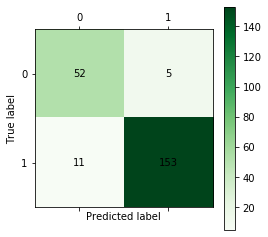

In [33]:
cm_plot(y_test, lgb_y_predict).show()

In [34]:
def plot_feature_importance(df, k_fold_object):
    df['average_feature_imp'] = df[['fold_{}'.format(fold + 1) for fold in range(k_fold_object.n_splits)]].mean(axis=1)
    plt.figure(figsize=(10, 40))
    sns.barplot(data=df.sort_values(by='average_feature_imp', ascending=False), x='average_feature_imp', y='feature');
    plt.title('Feature importance over {} folds average'.format(k_fold_object.n_splits))
    plt.show()

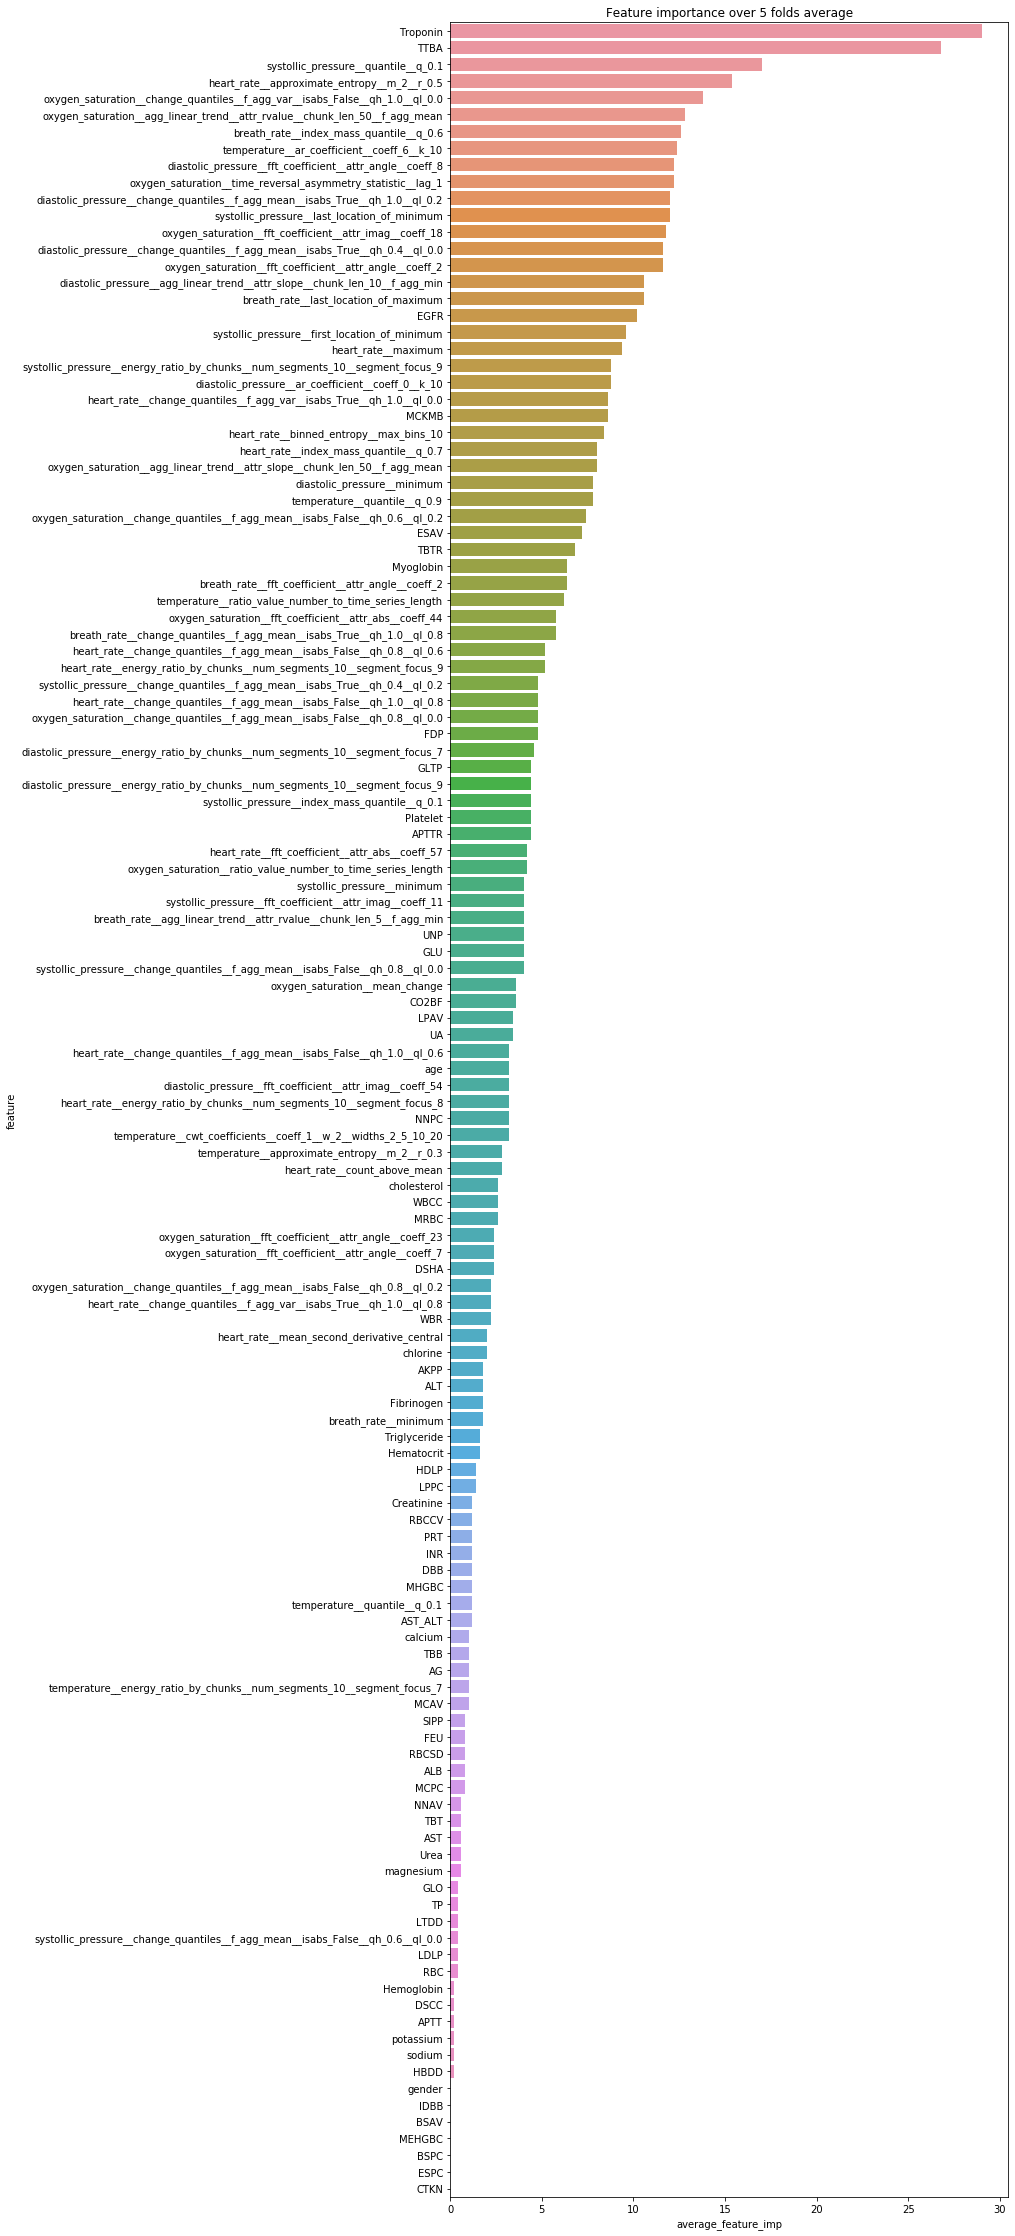

In [36]:
# Features importance ranking based on LightGBM model，used for feature selection.
plot_feature_importance(df=feature_importances, k_fold_object=kf)

# Stratified k-fold cross validation (Repeat 10 times.)

In [37]:
from sklearn.model_selection import StratifiedKFold 
# 分层交叉验证（Stratified k-fold cross validation）
# 属于交叉验证类型，分层指在每一折中都保持原始数据中各个类别的比例关系，这样的验证结果更加可信。

In [38]:
# Box plot of ACCURACY、AUC、Recall、Precision、BALANCED_ACCURACY
# for machine learning models with 5-fold cross-validation in our dataset. Repeat 10 times.
# °: the outliers of box plot.

In [39]:
results_lgb_accuracy = []
results_lgb_auc = []
results_lgb_recall = []
results_lgb_precision = []
results_lgb_balanced_accuracy = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    lgb_accuracy = []
    lgb_auc = []
    lgb_recall = []
    lgb_precision = []
    lgb_balanced_accuracy = []
    roc_auc = []
    #pred_on_test = np.zeros(X_test.shape[0])
    for index, (train_index, valid_index) in enumerate(kf.split(X=X, y=y)):
        print(f"FOLD {index+1}")
        X_train_fold, y_train_fold = X.iloc[train_index], y.iloc[train_index]
        X_valid_fold, y_valid_fold = X.iloc[valid_index], y.iloc[valid_index]

        dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
        dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

        lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

        y_valid_predict = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
        #pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds
    
        threshold = 0.5
        lgb_y_valid_predict = []

        for pred in y_valid_predict:  
            result = 1 if pred > threshold else 0
            lgb_y_valid_predict.append(result)

        # winsorization
        y_valid_predict = np.clip(a=y_valid_predict, a_min=0, a_max=1)
        #pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)
    
        lgb_accuracy.append(np.round(accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_auc.append(np.round(roc_auc_score(y_valid_fold, y_valid_predict), 5))
        lgb_recall.append(np.round(recall_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_precision.append(np.round(precision_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_balanced_accuracy.append(np.round(balanced_accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))

        print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_predict), 5)}")
        roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_predict)/num_folds)
    
    print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc), 5)}")
    results_lgb_accuracy.append(sum(lgb_accuracy) / 5)
    results_lgb_auc.append(sum(lgb_auc) / 5)
    results_lgb_recall.append(sum(lgb_recall) / 5)
    results_lgb_precision.append(sum(lgb_precision) / 5)
    results_lgb_balanced_accuracy.append(sum(lgb_balanced_accuracy) / 5)

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0194056	training's auc: 1	valid_1's binary_logloss: 0.201393	valid_1's auc: 0.970565
[500]	training's binary_logloss: 0.00206275	training's auc: 1	valid_1's binary_logloss: 0.254282	valid_1's auc: 0.967752
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.0373835	training's auc: 0.999987	valid_1's binary_logloss: 0.195532	valid_1's auc: 0.972272
FOLD 1: ROC_AUC  => 0.97227
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0231469	training's auc: 1	valid_1's binary_logloss: 0.170545	valid_1's auc: 0.980711
[500]	training's binary_logloss: 0.00302217	training's auc: 1	valid_1's binary_logloss: 0.193095	valid_1's auc: 0.979405
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.0252581	training's auc: 1	valid_1's binary_logloss: 0.168766	valid_1's auc: 0.98051
FOLD 2: ROC_AUC  => 0.98051
FOLD 3
T

[750]	training's binary_logloss: 0.000409729	training's auc: 1	valid_1's binary_logloss: 0.239279	valid_1's auc: 0.972775
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00661315	training's auc: 1	valid_1's binary_logloss: 0.19284	valid_1's auc: 0.971469
FOLD 1: ROC_AUC  => 0.97147
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.024966	training's auc: 1	valid_1's binary_logloss: 0.169792	valid_1's auc: 0.978903
[500]	training's binary_logloss: 0.00335426	training's auc: 1	valid_1's binary_logloss: 0.188545	valid_1's auc: 0.979305
[750]	training's binary_logloss: 0.000457932	training's auc: 1	valid_1's binary_logloss: 0.225167	valid_1's auc: 0.977999
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0234609	training's auc: 1	valid_1's binary_logloss: 0.167385	valid_1's auc: 0.979707
FOLD 2: ROC_AUC  => 0.97971
FOLD 3
Training until validation scores don't improve for 500 rounds
[250]	traini

[250]	training's binary_logloss: 0.0231389	training's auc: 1	valid_1's binary_logloss: 0.219886	valid_1's auc: 0.96313
[500]	training's binary_logloss: 0.00275561	training's auc: 1	valid_1's binary_logloss: 0.270714	valid_1's auc: 0.960518
Early stopping, best iteration is:
[80]	training's binary_logloss: 0.111982	training's auc: 0.998292	valid_1's binary_logloss: 0.21646	valid_1's auc: 0.967048
FOLD 1: ROC_AUC  => 0.96705
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0240494	training's auc: 1	valid_1's binary_logloss: 0.181647	valid_1's auc: 0.980008
[500]	training's binary_logloss: 0.00295694	training's auc: 1	valid_1's binary_logloss: 0.209992	valid_1's auc: 0.979807
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0403708	training's auc: 0.999981	valid_1's binary_logloss: 0.170421	valid_1's auc: 0.981214
FOLD 2: ROC_AUC  => 0.98121
FOLD 3
Training until validation scores don't improve for 500 rounds
[250

Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0232123	training's auc: 1	valid_1's binary_logloss: 0.196417	valid_1's auc: 0.964436
[500]	training's binary_logloss: 0.00272562	training's auc: 1	valid_1's binary_logloss: 0.214526	valid_1's auc: 0.96745
[750]	training's binary_logloss: 0.000356161	training's auc: 1	valid_1's binary_logloss: 0.262386	valid_1's auc: 0.967651
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.021765	training's auc: 1	valid_1's binary_logloss: 0.193977	valid_1's auc: 0.96514
FOLD 1: ROC_AUC  => 0.96514
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's binary_logloss: 0.0227249	training's auc: 1	valid_1's binary_logloss: 0.189884	valid_1's auc: 0.969962
[500]	training's binary_logloss: 0.00299853	training's auc: 1	valid_1's binary_logloss: 0.218014	valid_1's auc: 0.96966
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.0516802	training

In [40]:
results_lgb_accuracy

[0.938274,
 0.937326,
 0.9282320000000001,
 0.9364380000000001,
 0.9373100000000001,
 0.941836,
 0.9309420000000002,
 0.9400639999999999,
 0.935468,
 0.937336]

In [41]:
results_lr_accuracy = []
results_knn_accuracy = []
results_gnb_accuracy = []
results_svc_accuracy = []
results_tree_accuracy = []
results_rf_accuracy = []
results_abc_accuracy = []
results_gbc_accuracy = []
for i in range(10):
    strKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    #print(cross_val_score(lr, X, y, cv=strKFold, scoring='accuracy').mean())
    results_lr_accuracy.append(cross_val_score(lr, X, y, cv=strKFold, scoring='accuracy').mean())
    results_knn_accuracy.append(cross_val_score(knn, X, y, cv=strKFold, scoring='accuracy').mean())
    results_gnb_accuracy.append(cross_val_score(gnb, X, y, cv=strKFold, scoring='accuracy').mean())
    results_svc_accuracy.append(cross_val_score(svc, X, y, cv=strKFold, scoring='accuracy').mean())
    results_tree_accuracy.append(cross_val_score(tree, X, y, cv=strKFold, scoring='accuracy').mean())
    results_rf_accuracy.append(cross_val_score(rf, X, y, cv=strKFold, scoring='accuracy').mean())
    results_abc_accuracy.append(cross_val_score(abc, X, y, cv=strKFold, scoring='accuracy').mean())
    results_gbc_accuracy.append(cross_val_score(gbc, X, y, cv=strKFold, scoring='accuracy').mean())

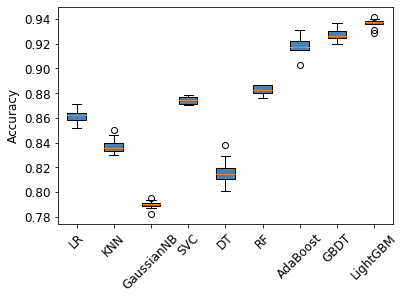

In [50]:
result_accuracy_10 = [results_lr_accuracy, results_knn_accuracy, results_gnb_accuracy, results_svc_accuracy,
          results_tree_accuracy, results_rf_accuracy, results_abc_accuracy, results_gbc_accuracy, results_lgb_accuracy]

labels = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

#plt.figure(figsize=(6,4),dpi=300)
plt.boxplot(result_accuracy_10, vert=True, patch_artist=True, widths=0.5, labels=labels, boxprops={'color':'black', 'facecolor':'steelblue'})       
plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.ylabel("Accuracy", {'size' : 12,})
plt.savefig("./pics/Accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

In [51]:
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy of LR(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lr_accuracy).mean(), np.array(results_lr_accuracy).std() * 2))

print("Accuracy of KNN(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_knn_accuracy).mean(), np.array(results_knn_accuracy).std() * 2))

print("Accuracy of GaussianNB(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gnb_accuracy).mean(), np.array(results_gnb_accuracy).std() * 2))

print("Accuracy of SVC(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_svc_accuracy).mean(), np.array(results_svc_accuracy).std() * 2))

print("Accuracy of TREE(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_tree_accuracy).mean(), np.array(results_tree_accuracy).std() * 2))

print("Accuracy of RF(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_rf_accuracy).mean(), np.array(results_rf_accuracy).std() * 2))

print("Accuracy of AdaBoost(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_abc_accuracy).mean(), np.array(results_abc_accuracy).std() * 2))

print("Accuracy of GBDT(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gbc_accuracy).mean(), np.array(results_gbc_accuracy).std() * 2))

print("Accuracy of LightGBM(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lgb_accuracy).mean(), np.array(results_lgb_accuracy).std() * 2))

Accuracy of LR(0.95 confidence): 0.861 (+/- 0.010)
Accuracy of KNN(0.95 confidence): 0.837 (+/- 0.012)
Accuracy of GaussianNB(0.95 confidence): 0.790 (+/- 0.007)
Accuracy of SVC(0.95 confidence): 0.874 (+/- 0.006)
Accuracy of TREE(0.95 confidence): 0.817 (+/- 0.021)
Accuracy of RF(0.95 confidence): 0.882 (+/- 0.007)
Accuracy of AdaBoost(0.95 confidence): 0.918 (+/- 0.014)
Accuracy of GBDT(0.95 confidence): 0.927 (+/- 0.009)
Accuracy of LightGBM(0.95 confidence): 0.936 (+/- 0.008)


In [52]:
results_lr_auc = []
results_knn_auc = []
results_gnb_auc = []
results_svc_auc = []
results_tree_auc = []
results_rf_auc = []
results_abc_auc = []
results_gbc_auc = []
for i in range(10):
    strKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    results_lr_auc.append(cross_val_score(lr, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_knn_auc.append(cross_val_score(knn, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_gnb_auc.append(cross_val_score(gnb, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_svc_auc.append(cross_val_score(svc, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_tree_auc.append(cross_val_score(tree, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_rf_auc.append(cross_val_score(rf, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_abc_auc.append(cross_val_score(abc, X, y, cv=strKFold, scoring='roc_auc').mean())
    results_gbc_auc.append(cross_val_score(gbc, X, y, cv=strKFold, scoring='roc_auc').mean())

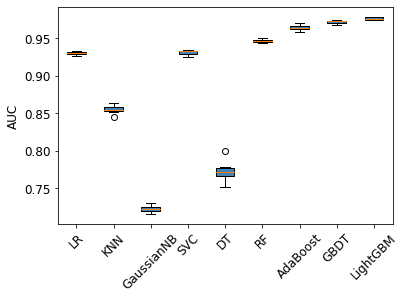

In [53]:
result_auc_10 = [results_lr_auc, results_knn_auc, results_gnb_auc, results_svc_auc,
          results_tree_auc, results_rf_auc, results_abc_auc, results_gbc_auc, results_lgb_auc]

labels = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

#plt.figure(figsize=(10,6))
plt.boxplot(result_auc_10, vert=True, patch_artist=True, widths=0.5, labels=labels, boxprops={'color':'black', 'facecolor':'steelblue'})       
plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.ylabel("AUC", {'size' : 12,})
plt.savefig("./pics/AUC.png", dpi=300, bbox_inches='tight')
plt.show()

In [54]:
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("AUC of LR(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lr_auc).mean(), np.array(results_lr_auc).std() * 2))

print("AUC of KNN(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_knn_auc).mean(), np.array(results_knn_auc).std() * 2))

print("AUC of GaussianNB(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gnb_auc).mean(), np.array(results_gnb_auc).std() * 2))

print("AUC of SVC(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_svc_auc).mean(), np.array(results_svc_auc).std() * 2))

print("AUC of TREE(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_tree_auc).mean(), np.array(results_tree_auc).std() * 2))

print("AUC of RF(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_rf_auc).mean(), np.array(results_rf_auc).std() * 2))

print("AUC of AdaBoost(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_abc_auc).mean(), np.array(results_abc_auc).std() * 2))

print("AUC of GBDT(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gbc_auc).mean(), np.array(results_gbc_auc).std() * 2))

print("AUC of LightGBM(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lgb_auc).mean(), np.array(results_lgb_auc).std() * 2))

AUC of LR(0.95 confidence): 0.930 (+/- 0.004)
AUC of KNN(0.95 confidence): 0.855 (+/- 0.010)
AUC of GaussianNB(0.95 confidence): 0.723 (+/- 0.010)
AUC of SVC(0.95 confidence): 0.931 (+/- 0.006)
AUC of TREE(0.95 confidence): 0.772 (+/- 0.024)
AUC of RF(0.95 confidence): 0.947 (+/- 0.004)
AUC of AdaBoost(0.95 confidence): 0.964 (+/- 0.007)
AUC of GBDT(0.95 confidence): 0.972 (+/- 0.004)
AUC of LightGBM(0.95 confidence): 0.976 (+/- 0.003)


In [55]:
results_lr_recall = []
results_knn_recall = []
results_gnb_recall = []
results_svc_recall = []
results_tree_recall = []
results_rf_recall = []
results_abc_recall = []
results_gbc_recall = []
for i in range(10):
    strKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    results_lr_recall.append(cross_val_score(lr, X, y, cv=strKFold, scoring='recall').mean())
    results_knn_recall.append(cross_val_score(knn, X, y, cv=strKFold, scoring='recall').mean())
    results_gnb_recall.append(cross_val_score(gnb, X, y, cv=strKFold, scoring='recall').mean())
    results_svc_recall.append(cross_val_score(svc, X, y, cv=strKFold, scoring='recall').mean())
    results_tree_recall.append(cross_val_score(tree, X, y, cv=strKFold, scoring='recall').mean())
    results_rf_recall.append(cross_val_score(rf, X, y, cv=strKFold, scoring='recall').mean())
    results_abc_recall.append(cross_val_score(abc, X, y, cv=strKFold, scoring='recall').mean())
    results_gbc_recall.append(cross_val_score(gbc, X, y, cv=strKFold, scoring='recall').mean())

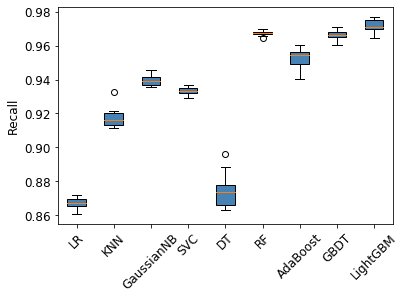

In [56]:
result_recall_10 = [results_lr_recall, results_knn_recall, results_gnb_recall, results_svc_recall,
          results_tree_recall, results_rf_recall, results_abc_recall, results_gbc_recall, results_lgb_recall]

labels = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

#plt.figure(figsize=(10,6))
plt.boxplot(result_recall_10, vert=True, patch_artist=True, widths=0.5, labels=labels, boxprops={'color':'black', 'facecolor':'steelblue'})       
plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.ylabel("Recall", {'size' : 12,})
plt.savefig("./pics/Recall.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("RECALL of LR(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lr_recall).mean(), np.array(results_lr_recall).std() * 2))

print("RECALL of KNN(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_knn_recall).mean(), np.array(results_knn_recall).std() * 2))

print("RECALL of GaussianNB(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gnb_recall).mean(), np.array(results_gnb_recall).std() * 2))

print("RECALL of SVC(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_svc_recall).mean(), np.array(results_svc_recall).std() * 2))

print("RECALL of TREE(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_tree_recall).mean(), np.array(results_tree_recall).std() * 2))

print("RECALL of RF(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_rf_recall).mean(), np.array(results_rf_recall).std() * 2))

print("RECALL of AdaBoost(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_abc_recall).mean(), np.array(results_abc_recall).std() * 2))

print("RECALL of GBDT(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gbc_recall).mean(), np.array(results_gbc_recall).std() * 2))

print("RECALL of LightGBM(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lgb_recall).mean(), np.array(results_lgb_recall).std() * 2))

RECALL of LR(0.95 confidence): 0.867 (+/- 0.006)
RECALL of KNN(0.95 confidence): 0.918 (+/- 0.012)
RECALL of GaussianNB(0.95 confidence): 0.939 (+/- 0.006)
RECALL of SVC(0.95 confidence): 0.933 (+/- 0.004)
RECALL of TREE(0.95 confidence): 0.875 (+/- 0.020)
RECALL of RF(0.95 confidence): 0.967 (+/- 0.003)
RECALL of AdaBoost(0.95 confidence): 0.953 (+/- 0.011)
RECALL of GBDT(0.95 confidence): 0.966 (+/- 0.006)
RECALL of LightGBM(0.95 confidence): 0.971 (+/- 0.008)


In [58]:
results_lr_precision = []
results_knn_precision = []
results_gnb_precision = []
results_svc_precision = []
results_tree_precision = []
results_rf_precision = []
results_abc_precision = []
results_gbc_precision = []
for i in range(10):
    strKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    #print(cross_val_score(lr, X, y, cv=strKFold, scoring='accuracy').mean())
    results_lr_precision.append(cross_val_score(lr, X, y, cv=strKFold, scoring='precision').mean())
    results_knn_precision.append(cross_val_score(knn, X, y, cv=strKFold, scoring='precision').mean())
    results_gnb_precision.append(cross_val_score(gnb, X, y, cv=strKFold, scoring='precision').mean())
    results_svc_precision.append(cross_val_score(svc, X, y, cv=strKFold, scoring='precision').mean())
    results_tree_precision.append(cross_val_score(tree, X, y, cv=strKFold, scoring='precision').mean())
    results_rf_precision.append(cross_val_score(rf, X, y, cv=strKFold, scoring='precision').mean())
    results_abc_precision.append(cross_val_score(abc, X, y, cv=strKFold, scoring='precision').mean())
    results_gbc_precision.append(cross_val_score(gbc, X, y, cv=strKFold, scoring='precision').mean())

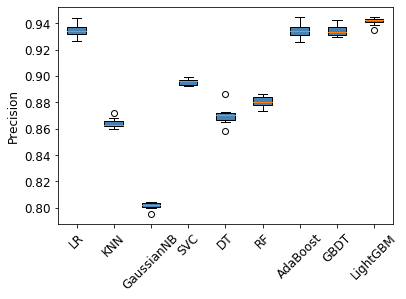

In [59]:
result_precision_10 = [results_lr_precision, results_knn_precision, results_gnb_precision, results_svc_precision,
          results_tree_precision, results_rf_precision, results_abc_precision, results_gbc_precision, results_lgb_precision]

labels = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

#plt.figure(figsize=(10,6))
plt.boxplot(result_precision_10, vert=True, patch_artist=True, widths=0.5, labels=labels, boxprops={'color':'black', 'facecolor':'steelblue'})       
plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.ylabel("Precision", {'size' : 12,})
plt.savefig("./pics/Precision.png", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("PRECISION of LR(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lr_precision).mean(), np.array(results_lr_precision).std() * 2))

print("PRECISION of KNN(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_knn_precision).mean(), np.array(results_knn_precision).std() * 2))

print("PRECISION of GaussianNB(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gnb_precision).mean(), np.array(results_gnb_precision).std() * 2))

print("PRECISION of SVC(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_svc_precision).mean(), np.array(results_svc_precision).std() * 2))

print("PRECISION of TREE(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_tree_precision).mean(), np.array(results_tree_precision).std() * 2))

print("PRECISION of RF(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_rf_precision).mean(), np.array(results_rf_precision).std() * 2))

print("PRECISION of AdaBoost(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_abc_precision).mean(), np.array(results_abc_precision).std() * 2))

print("PRECISION of GBDT(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gbc_precision).mean(), np.array(results_gbc_precision).std() * 2))

print("PRECISION of LightGBM(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lgb_precision).mean(), np.array(results_lgb_precision).std() * 2))

PRECISION of LR(0.95 confidence): 0.934 (+/- 0.010)
PRECISION of KNN(0.95 confidence): 0.864 (+/- 0.007)
PRECISION of GaussianNB(0.95 confidence): 0.802 (+/- 0.005)
PRECISION of SVC(0.95 confidence): 0.896 (+/- 0.005)
PRECISION of TREE(0.95 confidence): 0.870 (+/- 0.014)
PRECISION of RF(0.95 confidence): 0.881 (+/- 0.008)
PRECISION of AdaBoost(0.95 confidence): 0.935 (+/- 0.013)
PRECISION of GBDT(0.95 confidence): 0.934 (+/- 0.008)
PRECISION of LightGBM(0.95 confidence): 0.942 (+/- 0.006)


In [61]:
results_lr_balanced_accuracy = []
results_knn_balanced_accuracy = []
results_gnb_balanced_accuracy = []
results_svc_balanced_accuracy = []
results_tree_balanced_accuracy = []
results_rf_balanced_accuracy = []
results_abc_balanced_accuracy = []
results_gbc_balanced_accuracy = []
for i in range(10):
    strKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    #print(cross_val_score(lr, X, y, cv=strKFold, scoring='accuracy').mean())
    results_lr_balanced_accuracy.append(cross_val_score(lr, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_knn_balanced_accuracy.append(cross_val_score(knn, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_gnb_balanced_accuracy.append(cross_val_score(gnb, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_svc_balanced_accuracy.append(cross_val_score(svc, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_tree_balanced_accuracy.append(cross_val_score(tree, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_rf_balanced_accuracy.append(cross_val_score(rf, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_abc_balanced_accuracy.append(cross_val_score(abc, X, y, cv=strKFold, scoring='balanced_accuracy').mean())
    results_gbc_balanced_accuracy.append(cross_val_score(gbc, X, y, cv=strKFold, scoring='balanced_accuracy').mean())

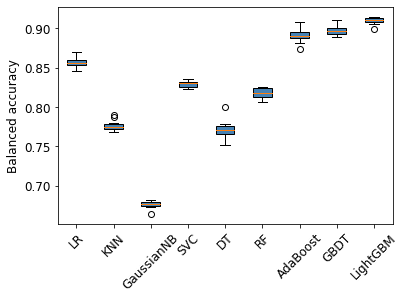

In [62]:
result_balanced_accuracy_10 = [results_lr_balanced_accuracy, results_knn_balanced_accuracy, results_gnb_balanced_accuracy, 
                               results_svc_balanced_accuracy,results_tree_balanced_accuracy, results_rf_balanced_accuracy, 
                               results_abc_balanced_accuracy, results_gbc_balanced_accuracy, results_lgb_balanced_accuracy]

labels = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

#plt.figure(figsize=(10,6))
plt.boxplot(result_balanced_accuracy_10, vert=True, patch_artist=True, widths=0.5, labels=labels, boxprops={'color':'black', 'facecolor':'steelblue'})       
plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.ylabel("Balanced accuracy", {'size' : 12,})
plt.savefig("./pics/Balanced accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("BALANCED_ACCURACY of LR(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lr_balanced_accuracy).mean(), np.array(results_lr_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of KNN(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_knn_balanced_accuracy).mean(), np.array(results_knn_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of GaussianNB(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gnb_balanced_accuracy).mean(), np.array(results_gnb_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of SVC(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_svc_balanced_accuracy).mean(), np.array(results_svc_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of TREE(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_tree_balanced_accuracy).mean(), np.array(results_tree_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of RF(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_rf_balanced_accuracy).mean(), np.array(results_rf_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of AdaBoost(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_abc_balanced_accuracy).mean(), np.array(results_abc_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of GBDT(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_gbc_balanced_accuracy).mean(), np.array(results_gbc_balanced_accuracy).std() * 2))

print("BALANCED_ACCURACY of LightGBM(0.95 confidence): %0.3f (+/- %0.3f)" % 
      (np.array(results_lgb_balanced_accuracy).mean(), np.array(results_lgb_balanced_accuracy).std() * 2))

BALANCED_ACCURACY of LR(0.95 confidence): 0.857 (+/- 0.014)
BALANCED_ACCURACY of KNN(0.95 confidence): 0.776 (+/- 0.014)
BALANCED_ACCURACY of GaussianNB(0.95 confidence): 0.676 (+/- 0.010)
BALANCED_ACCURACY of SVC(0.95 confidence): 0.829 (+/- 0.008)
BALANCED_ACCURACY of TREE(0.95 confidence): 0.772 (+/- 0.024)
BALANCED_ACCURACY of RF(0.95 confidence): 0.818 (+/- 0.013)
BALANCED_ACCURACY of AdaBoost(0.95 confidence): 0.892 (+/- 0.019)
BALANCED_ACCURACY of GBDT(0.95 confidence): 0.898 (+/- 0.013)
BALANCED_ACCURACY of LightGBM(0.95 confidence): 0.910 (+/- 0.009)


In [64]:
avg_accuracy = [sum(results_lr_accuracy) / 10, sum(results_knn_accuracy) / 10, sum(results_gnb_accuracy) / 10,
                sum(results_svc_accuracy) / 10, sum(results_tree_accuracy) / 10, sum(results_rf_accuracy) / 10,
                sum(results_abc_accuracy) / 10, sum(results_gbc_accuracy) / 10, sum(results_lgb_accuracy) / 10]

In [65]:
avg_accuracy

[0.8611355606520796,
 0.8373474658567325,
 0.7897175561478543,
 0.8742002933944916,
 0.8166106737742516,
 0.8824777371433294,
 0.91797557800781,
 0.9272460174797,
 0.9363225999999999]

In [66]:
avg_auc = [sum(results_lr_auc) / 10, sum(results_knn_auc) / 10, sum(results_gnb_auc) / 10,
            sum(results_svc_auc) / 10, sum(results_tree_auc) / 10, sum(results_rf_auc) / 10,
            sum(results_abc_auc) / 10, sum(results_gbc_auc) / 10, sum(results_lgb_auc) / 10]

In [67]:
avg_auc

[0.9300312326366378,
 0.8554600228237069,
 0.722921148811139,
 0.9306709222811207,
 0.7724979993237022,
 0.9465037553679739,
 0.9638223277249995,
 0.971550063515925,
 0.9762253999999999]

In [68]:
avg_recall = [sum(results_lr_recall) / 10, sum(results_knn_recall) / 10, sum(results_gnb_recall) / 10,
                sum(results_svc_recall) / 10, sum(results_tree_recall) / 10, sum(results_rf_recall) / 10,
                sum(results_abc_recall) / 10, sum(results_gbc_recall) / 10, sum(results_lgb_recall) / 10]

In [69]:
avg_recall

[0.8671474643231475,
 0.9176481496412159,
 0.9393283882931549,
 0.9333733774086916,
 0.874739982262356,
 0.9673957913408046,
 0.9526525840522453,
 0.9663742642908973,
 0.9714394000000001]

In [70]:
avg_precision = [sum(results_lr_precision) / 10, sum(results_knn_precision) / 10, sum(results_gnb_precision) / 10,
                sum(results_svc_precision) / 10, sum(results_tree_precision) / 10, sum(results_rf_precision) / 10,
                sum(results_abc_precision) / 10, sum(results_gbc_precision) / 10, sum(results_lgb_precision) / 10]

In [71]:
avg_precision

[0.9344438815517716,
 0.8639723888491829,
 0.8016088197426516,
 0.8955933947357775,
 0.8701025665977415,
 0.8805931960040635,
 0.934504672719845,
 0.9344623532948348,
 0.9416737999999999]

In [72]:
avg_balanced_accuracy = [sum(results_lr_balanced_accuracy) / 10, sum(results_knn_balanced_accuracy) / 10, 
                         sum(results_gnb_balanced_accuracy) / 10, sum(results_svc_balanced_accuracy) / 10, 
                         sum(results_tree_balanced_accuracy) / 10, sum(results_rf_balanced_accuracy) / 10,
                         sum(results_abc_balanced_accuracy) / 10, sum(results_gbc_balanced_accuracy) / 10, 
                         sum(results_lgb_balanced_accuracy) / 10]

In [73]:
avg_balanced_accuracy

[0.8565563230473904,
 0.776420080965001,
 0.6761849314737663,
 0.8292954956679914,
 0.7724979993237022,
 0.8180296929054254,
 0.8916744743097886,
 0.8975445310189766,
 0.9096692000000001]

In [74]:
# Results comparison for machine learning models with 5-fold cross-validation in our dataset. Repeat 10 times.
results_lr_avg = [sum(results_lr_accuracy) / 10, sum(results_lr_auc) / 10, sum(results_lr_recall) / 10, 
                  sum(results_lr_precision) / 10, sum(results_lr_balanced_accuracy) / 10]

results_knn_avg = [sum(results_knn_accuracy) / 10, sum(results_knn_auc) / 10, sum(results_knn_recall) / 10, 
                   sum(results_knn_precision) / 10, sum(results_knn_balanced_accuracy) / 10]

results_gnb_avg = [sum(results_gnb_accuracy) / 10, sum(results_gnb_auc) / 10, sum(results_gnb_recall) / 10, 
                   sum(results_gnb_precision) / 10, sum(results_gnb_balanced_accuracy) / 10]

results_svc_avg = [sum(results_svc_accuracy) / 10, sum(results_svc_auc) / 10, sum(results_svc_recall) / 10, 
                   sum(results_svc_precision) / 10, sum(results_svc_balanced_accuracy) / 10]

results_tree_avg = [sum(results_tree_accuracy) / 10, sum(results_tree_auc) / 10, sum(results_tree_recall) / 10, 
                    sum(results_tree_precision) / 10, sum(results_tree_balanced_accuracy) / 10]

results_rf_avg = [sum(results_rf_accuracy) / 10, sum(results_rf_auc) / 10, sum(results_rf_recall) / 10, 
                  sum(results_rf_precision) / 10, sum(results_rf_balanced_accuracy) / 10]

results_abc_avg = [sum(results_abc_accuracy) / 10, sum(results_abc_auc) / 10, sum(results_abc_recall) / 10, 
                   sum(results_abc_precision) / 10, sum(results_abc_balanced_accuracy) / 10]

results_gbc_avg = [sum(results_gbc_accuracy) / 10, sum(results_gbc_auc) / 10, sum(results_gbc_recall) / 10, 
                   sum(results_gbc_precision) / 10, sum(results_gbc_balanced_accuracy) / 10]

results_lgb_avg = [sum(results_lgb_accuracy) / 10, sum(results_lgb_auc) / 10,  sum(results_lgb_recall) / 10, 
                    sum(results_lgb_precision) / 10, sum(results_lgb_balanced_accuracy) / 10]

In [75]:
results = [results_lr_avg, results_knn_avg, results_gnb_avg, results_svc_avg, results_tree_avg, 
           results_rf_avg, results_abc_avg, results_gbc_avg, results_lgb_avg]

In [76]:
# 用表格展示
results_compare = pd.DataFrame(results)
results_compare.columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'Balanced accuracy']
results_compare.index = ['LR', 'KNN', 'GaussianNB', 'SVC', 'DT', 'RF', 'AdaBoost', 'GBDT', 'LightGBM']

# 高亮最大值
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color:yellow' if v else '' for v in is_max]

results_compare.style.apply(highlight_max)

,Accuracy,AUC,Recall,Precision,Balanced accuracy
LR,0.861136,0.930031,0.867147,0.934444,0.856556
KNN,0.837347,0.85546,0.917648,0.863972,0.77642
GaussianNB,0.789718,0.722921,0.939328,0.801609,0.676185
SVC,0.8742,0.930671,0.933373,0.895593,0.829295
DT,0.816611,0.772498,0.87474,0.870103,0.772498
RF,0.882478,0.946504,0.967396,0.880593,0.81803
AdaBoost,0.917976,0.963822,0.952653,0.934505,0.891674
GBDT,0.927246,0.97155,0.966374,0.934462,0.897545
LightGBM,0.936323,0.976225,0.971439,0.941674,0.909669


# ROC curve of machine learning models in testing dataset. 

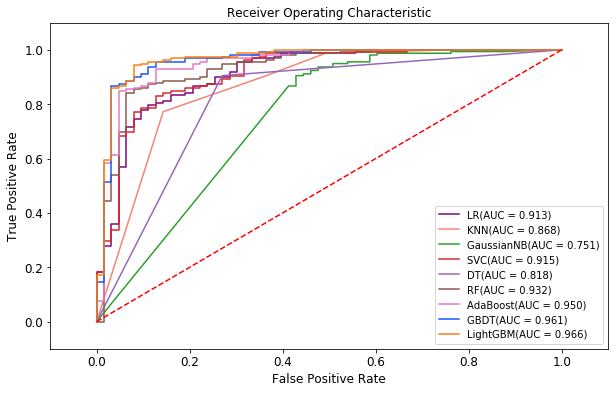

In [77]:
# ROC curve of machine learning models in testing dataset. 
# LR: Logistic Regression;
# KNN: K-NearestNeighbor; 
# GaussianNB: Gaussian Naive Byes;
# SVC: Support Vector Classification; 
# DT: Decision Tree;
# RF: Random Forest; 
# LightGBM: Light Gradient Boosting Machine
    
plt.figure(figsize=(10,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_y_probs[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, 'b', label='LR(AUC = %0.3f)' % roc_auc_lr, color='purple')

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_probs[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, 'b', label='KNN(AUC = %0.3f)' % roc_auc_knn, color='salmon')

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_y_probs[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, 'b', label='GaussianNB(AUC = %0.3f)' % roc_auc_gnb, color='#2ca02c')

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_y_probs[:, 1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, 'b', label='SVC(AUC = %0.3f)' % roc_auc_svc, color='#d62728')

fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_y_probs[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)
plt.plot(fpr_tree, tpr_tree, 'b', label='DT(AUC = %0.3f)' % roc_auc_tree, color='#9467bd')

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_probs[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, 'b', label='RF(AUC = %0.3f)' % roc_auc_rf, color='#8c564b')

fpr_abc, tpr_abc, _ = roc_curve(y_test, abc_y_probs[:, 1])
roc_auc_abc = auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, 'b', label='AdaBoost(AUC = %0.3f)' % roc_auc_abc, color='#e377c2')

fpr_gbc, tpr_gbc, _ = roc_curve(y_test, gbc_y_probs[:, 1])
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
plt.plot(fpr_gbc, tpr_gbc, 'b', label='GBDT(AUC = %0.3f)' % roc_auc_gbc, color='#1a55FF')

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, pred_on_test)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.plot(fpr_lgb, tpr_lgb, 'b', label='LightGBM(AUC = %0.3f)' % roc_auc_lgb, color='#ff7f0e')

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.tick_params(labelsize=12)
plt.xlabel('False Positive Rate', {'size' : 12,}) # 横坐标是fpr
plt.ylabel('True Positive Rate', {'size' : 12,})  # 纵坐标是tpr
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.savefig("./pics/ROC.png", dpi=300, bbox_inches='tight')
plt.show()

# The comparison of top 20 features with highest features importance ranking based on RF、ABC、GBC、LightGBM model,respectively.

In [78]:
importances = rf.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) oxygen_saturation__mean_change 0.098054
 2) systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.097125
 3) oxygen_saturation__time_reversal_asymmetry_statistic__lag_1 0.061443
 4) oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0 0.058445
 5) diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.053518
 6) systollic_pressure__last_location_of_minimum 0.052539
 7) oxygen_saturation__ratio_value_number_to_time_series_length 0.049142
 8) Myoglobin                      0.043587
 9) TTBA                           0.041256
10) systollic_pressure__quantile__q_0.1 0.031165
11) systollic_pressure__minimum    0.021737
12) heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.019159
13) Troponin                       0.018735
14) MCKMB                          0.018480
15) systollic_pressure__first_location_of_minimum 0.017383
16) EGFR                           0.015048
17) diastolic_pressure__ener

In [79]:
importances = abc.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) TTBA                           0.041237
 2) Troponin                       0.030928
 3) systollic_pressure__quantile__q_0.1 0.030928
 4) MCKMB                          0.030928
 5) oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.6__ql_0.2 0.030928
 6) oxygen_saturation__fft_coefficient__attr_angle__coeff_2 0.030928
 7) diastolic_pressure__agg_linear_trend__attr_slope__chunk_len_10__f_agg_min 0.020619
 8) breath_rate__change_quantiles__f_agg_mean__isabs_True__qh_1.0__ql_0.8 0.020619
 9) oxygen_saturation__fft_coefficient__attr_imag__coeff_18 0.020619
10) diastolic_pressure__fft_coefficient__attr_angle__coeff_8 0.020619
11) temperature__cwt_coefficients__coeff_1__w_2__widths_2_5_10_20 0.020619
12) heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.020619
13) diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_7 0.020619
14) temperature__ar_coefficient__coeff_6__k_10 0.020619
15) DSHA                           0.020619
16) 

In [80]:
importances = gbc.feature_importances_
feat_labels = data.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) oxygen_saturation__time_reversal_asymmetry_statistic__lag_1 0.089386
 2) oxygen_saturation__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.0 0.068695
 3) TTBA                           0.058449
 4) oxygen_saturation__mean_change 0.054606
 5) systollic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.051948
 6) MCKMB                          0.049206
 7) Troponin                       0.038928
 8) systollic_pressure__last_location_of_minimum 0.038912
 9) systollic_pressure__quantile__q_0.1 0.032952
10) heart_rate__approximate_entropy__m_2__r_0.5 0.029756
11) diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_9 0.027771
12) temperature__quantile__q_0.9   0.024459
13) heart_rate__energy_ratio_by_chunks__num_segments_10__segment_focus_8 0.021442
14) EGFR                           0.019983
15) heart_rate__index_mass_quantile__q_0.7 0.019478
16) diastolic_pressure__energy_ratio_by_chunks__num_segments_10__segment_focus_7 0.018829
17) t

In [81]:
feature_importances

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average_feature_imp
0,oxygen_saturation__agg_linear_trend__attr_rval...,11,15,9,10,19,12.8
1,diastolic_pressure__minimum,7,14,7,4,7,7.8
2,temperature__quantile__q_0.9,9,8,5,3,14,7.8
3,oxygen_saturation__time_reversal_asymmetry_sta...,17,10,11,8,15,12.2
4,systollic_pressure__minimum,6,6,2,2,4,4.0
5,diastolic_pressure__change_quantiles__f_agg_me...,11,14,13,6,14,11.6
6,systollic_pressure__first_location_of_minimum,8,24,5,7,4,9.6
7,diastolic_pressure__change_quantiles__f_agg_me...,22,10,7,4,17,12.0
8,diastolic_pressure__energy_ratio_by_chunks__nu...,5,5,5,1,6,4.4
9,diastolic_pressure__fft_coefficient__attr_imag...,6,5,0,1,4,3.2


In [82]:
feature = feature_importances[feature_importances['average_feature_imp'] != 0]
feature_sort = feature.sort_values(by="average_feature_imp" , ascending=False)

In [83]:
feature_name = feature_sort[feature_sort.columns[0]][0:20]

In [84]:
feature_avg_imp = feature_sort[feature_sort.columns[6]][0:20]

In [85]:
len(feature_name)

20

In [86]:
feature_top20 = feature_sort[feature_sort.columns[:]][0:20]

In [87]:
feature_top20

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average_feature_imp
129,Troponin,46,29,34,9,27,29.0
116,TTBA,30,24,33,14,33,26.8
53,systollic_pressure__quantile__q_0.1,18,22,19,9,17,17.0
42,heart_rate__approximate_entropy__m_2__r_0.5,25,27,11,5,9,15.4
19,oxygen_saturation__change_quantiles__f_agg_var...,21,12,17,7,12,13.8
0,oxygen_saturation__agg_linear_trend__attr_rval...,11,15,9,10,19,12.8
10,breath_rate__index_mass_quantile__q_0.6,13,19,14,4,13,12.6
18,temperature__ar_coefficient__coeff_6__k_10,17,15,12,2,16,12.4
26,diastolic_pressure__fft_coefficient__attr_angl...,15,13,13,4,16,12.2
3,oxygen_saturation__time_reversal_asymmetry_sta...,17,10,11,8,15,12.2


In [93]:
feature_top20.loc[53, 'feature'] = 'SP_quantile'
feature_top20.loc[42, 'feature'] = 'HR_approximate_entropy'
feature_top20.loc[19, 'feature'] = 'OS_change_quantiles'
feature_top20.loc[0, 'feature'] = 'OS_agg_linear_trend'
feature_top20.loc[10, 'feature'] = 'BR_index_mass_quantile'
feature_top20.loc[18, 'feature'] = 'TEM_ar_coefficient'
feature_top20.loc[26, 'feature'] = 'DP_fft_coefficient'
feature_top20.loc[3, 'feature'] = 'OS_time_reversal_asymmetry'
feature_top20.loc[7, 'feature'] = 'DP_change_quantiles_qh1_ql0.2'
feature_top20.loc[13, 'feature'] = 'SP_last_location_of_min'
feature_top20.loc[31, 'feature'] = 'OS_fft_coefficient_imag'
feature_top20.loc[5, 'feature'] = 'DP_change_quantiles_qh0.4_ql0'
feature_top20.loc[46, 'feature'] = 'OS_fft_coefficient_angle'
feature_top20.loc[33, 'feature'] = 'DP_agg_linear_trend'
feature_top20.loc[16, 'feature'] = 'BR_last_location_of_max'
feature_top20.loc[6, 'feature'] = 'SP_first_location_of_min'
feature_top20.loc[35, 'feature'] = 'HR_max'

In [94]:
feature_top20

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average_feature_imp
129,Troponin,46,29,34,9,27,29.0
116,TTBA,30,24,33,14,33,26.8
53,SP_quantile,18,22,19,9,17,17.0
42,HR_approximate_entropy,25,27,11,5,9,15.4
19,OS_change_quantiles,21,12,17,7,12,13.8
0,OS_agg_linear_trend,11,15,9,10,19,12.8
10,BR_index_mass_quantile,13,19,14,4,13,12.6
18,TEM_ar_coefficient,17,15,12,2,16,12.4
26,DP_fft_coefficient,15,13,13,4,16,12.2
3,OS_time_reversal_asymmetry,17,10,11,8,15,12.2


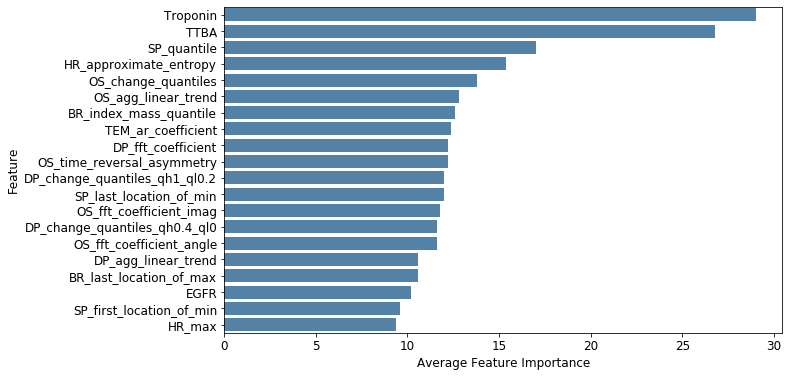

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_top20, x='average_feature_imp', y='feature', color='steelblue')
plt.tick_params(labelsize=12)
plt.xlabel('Average Feature Importance', {'size' : 12,}) 
plt.ylabel('Feature', {'size' : 12,}) 
plt.savefig("./pics/TOP 20 Feature of LightGBM.png", dpi=300, bbox_inches='tight')
plt.show()

# Accuracy to number of features selected with 5-fold cross-validation in vital signs for various algorithms

In [99]:
# Accuracy to number of features selected with 5-fold cross-validation(repeat 10 times) 
# in vital signs time series data for various algorithms
X_Num = np.arange(0.0, 160.0, 10)

In [100]:
Y_LR_ACCURACY = [0.730228, 0.808634, 0.830624, 0.846779, 0.859231, 0.862955, 0.861136, 0.872575, 
                0.873035, 0.873494, 0.874847, 0.876305, 0.875205, 0.875118, 0.877205, 0.876204]

Y_KNN_ACCURACY = [0.742122, 0.791291, 0.808091, 0.823514, 0.833504, 0.836526, 0.837347, 0.844978, 
                  0.845684, 0.84596, 0.855766, 0.85624, 0.856586, 0.85286, 0.850596, 0.855865]

Y_GaussianNB_ACCURACY = [0.73634, 0.759853, 0.768291, 0.779566, 0.791284, 0.795815, 0.789718, 0.79081,
                        0.789179, 0.791542, 0.792088, 0.790276, 0.793361, 0.791271, 0.790276, 0.78555]

Y_SVC_ACCURACY = [0.792104, 0.829063, 0.849236, 0.862946, 0.874197, 0.873294, 0.8742, 0.880929,
                 0.883644, 0.883467, 0.886734, 0.885374, 0.886005, 0.883284, 0.882736, 0.883202]

Y_DT_ACCURACY = [0.761299, 0.808705, 0.813611, 0.815351, 0.8089, 0.815592, 0.816611, 0.810331,
                0.811604, 0.808522, 0.803177, 0.806542, 0.805172, 0.809001, 0.806628, 0.805277]

Y_RF_ACCURACY = [0.828517, 0.873386, 0.885113, 0.883203, 0.883391, 0.881476, 0.882478, 0.880205,
                0.880569, 0.880202, 0.876027, 0.87593, 0.878838, 0.877755, 0.878477, 0.877571]

Y_AdaBoost_ACCURACY = [0.819054, 0.895012, 0.907283, 0.908079, 0.910709, 0.91715, 0.917976, 0.914964,
                      0.918615, 0.917996, 0.915061, 0.915797, 0.915517, 0.910889, 0.917979, 0.918338]

Y_GradientBoosting_ACCURACY = [0.854495, 0.910633, 0.918165, 0.925253, 0.924795, 0.928241, 0.927246, 0.92988,
                              0.926251, 0.928067, 0.927618, 0.927164, 0.925622, 0.926163, 0.92153, 0.927246]

Y_LightGBM_ACCURACY = [0.860578, 0.921891, 0.926436, 0.931327, 0.932157, 0.934142, 0.936323, 0.934413,
                      0.93588, 0.935873, 0.935784, 0.93469, 0.934965, 0.93451, 0.933334, 0.933328]

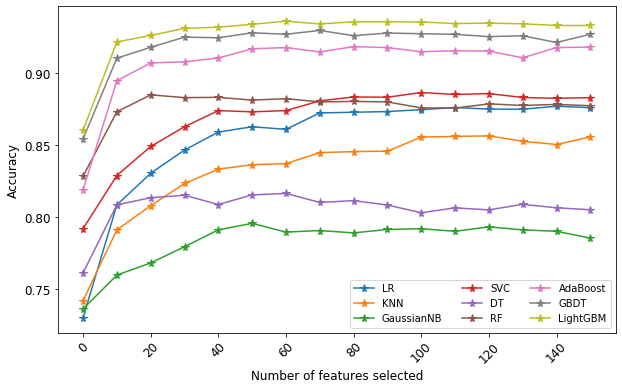

In [101]:
plt.figure(figsize=(10,6))
plt.plot(X_Num, Y_LR_ACCURACY, marker='*', ms=8, label="LR")   # "r" 表示红色，ms用来设置*的大小
plt.plot(X_Num, Y_KNN_ACCURACY, marker='*', ms=8, label="KNN")
plt.plot(X_Num, Y_GaussianNB_ACCURACY, marker='*', ms=8, label="GaussianNB")
plt.plot(X_Num, Y_SVC_ACCURACY, marker='*', ms=8, label="SVC")
plt.plot(X_Num, Y_DT_ACCURACY, marker='*', ms=8, label="DT")
plt.plot(X_Num, Y_RF_ACCURACY, marker='*', ms=8, label="RF")
plt.plot(X_Num, Y_AdaBoost_ACCURACY, marker='*', ms=8, label="AdaBoost")
plt.plot(X_Num, Y_GradientBoosting_ACCURACY, marker='*', ms=8, label="GBDT")
plt.plot(X_Num, Y_LightGBM_ACCURACY, marker='*', ms=8, label="LightGBM")

plt.xticks(rotation = 45)
plt.tick_params(labelsize=12)
plt.xlabel("Number of features selected", {'size' : 12,})
plt.ylabel("Accuracy", {'size' : 12,})
#plt.title("Accuracy to number of features selected in vital signs for various algorithms")
plt.legend(loc = 'best', ncol=3)   # upper left 将图例a显示到左上角
plt.savefig("./pics/Number of Features Selected.png", dpi=300, bbox_inches='tight')
plt.show()